In [1]:
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Print CPU Info
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.144
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.28
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [3]:
''' Imports, timing and visualization functions'''
import numpy as np
import scipy as sp
import scipy.linalg
import time
import matplotlib.pyplot as plt
import torch
import copy

# Testing
colormap= {
  'Naive Implementation': 'b',
  'NumPy': 'g',
  'SciPy': 'r',
  'PyTorch': 'c',
  'MATLAB': 'm'
}

def profile_fn(fn, inputs, iterations):
  total_time = 0
  for it in range(iterations):
    start = time.time()
    fn(*inputs)
    total_time += time.time() - start
  return total_time

colormap= {
  'Naive Implementation': 'b',
  'NumPy': 'g',
  'SciPy': 'r', 
  'PyTorch': 'c',
  'MATLAB': 'm'
}
def plot_times(times, tools, title1, title2, flops, iterations):
  for i, t in enumerate(times):
    plt.bar(i, t, label=f'{tools[i]} ({iterations[i]} iterations)', color=colormap[tools[i]])
  plt.ylabel('Time (seconds)')
  plt.xlabel('Programming Tool')
  plt.title(title1)
  plt.legend()
  plt.xticks([],[])
  plt.show()
  
  for i, its in enumerate(iterations):
    b = plt.bar(i, (its * flops) / times[i], label=f'{tools[i]}', color=colormap[tools[i]])
    plt.bar_label(b, fmt='%.2E')
  plt.ylabel('FLOPS per second')
  plt.xlabel('Programming Tool')
  plt.title(title2)
  plt.legend()
  plt.xticks([],[])
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.matmul is deprecated and will be removed in SciPy 2.0.0, use numpy.matmul instead
  import sys


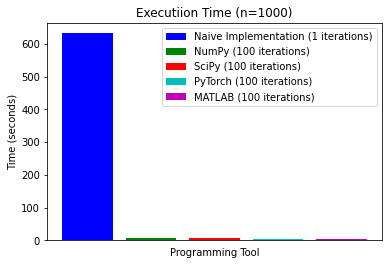

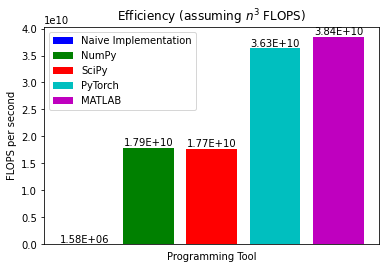

In [4]:
# 1. matrix multiplication
def mat_mul_np(A, B):
  C = np.matmul(A, B)
  return C

def mat_mul_sp(A, B):
  C = sp.matmul(A, B)
  return C

def mat_mul_naive(A, B):
  C = []
  for i in range(len(A)):
    C.append([])
    for j in range(len(B[0])):
      val = 0
      for k in range(len(A[0])):
        val += A[i][k] * B[k][j]  
      C[i].append(val)
  return C

def mat_mul_torch(A, B):
  C = torch.matmul(A, B)
  return C

# Timing and Visualization (mat mul)
times = []
A = np.random.rand(1000, 1000)
B = np.random.rand(1000, 1000)
times.append(profile_fn(mat_mul_naive, [A, B], 1))
times.append(profile_fn(mat_mul_np, [A, B], 100))
times.append(profile_fn(mat_mul_sp, [A, B], 100))
C = torch.rand(1000, 1000)
D = torch.rand(1000, 1000)
times.append(profile_fn(mat_mul_torch, [C, D], 100))
times.append(2.604540)
plot_times(
  times=times, 
  tools=['Naive Implementation', 'NumPy', 'SciPy', 'PyTorch', 'MATLAB'],
  title1='Executiion Time (n=1000)', 
  title2='Efficiency (assuming $n^3$ FLOPS)',
  flops=1000**3,
  iterations=[1, 100, 100, 100, 100])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.matmul is deprecated and will be removed in SciPy 2.0.0, use numpy.matmul instead
  import sys


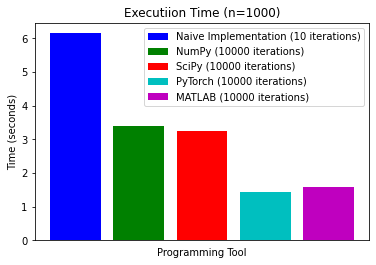

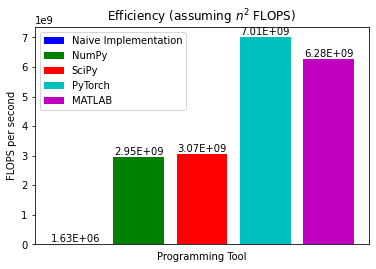

In [5]:
# Timing and Visualization (matrix-vec product)
times = []
A = np.random.rand(1000, 1000)
b = np.random.rand(1000, 1)
times.append(profile_fn(mat_mul_naive, [A, b], 10))
times.append(profile_fn(mat_mul_np, [A, b], 10000))
times.append(profile_fn(mat_mul_sp, [A, b], 10000))
C = torch.rand(1000, 1000)
d = torch.rand(1000, 1)
times.append(profile_fn(mat_mul_torch, [C, d], 10000))
times.append(1.593010)
plot_times(
  times=times, 
  tools=['Naive Implementation', 'NumPy', 'SciPy', 'PyTorch', 'MATLAB'],
  title1='Executiion Time (n=1000)', 
  title2='Efficiency (assuming $n^2$ FLOPS)',
  flops=1000**2,
  iterations=[10, 10000, 10000, 10000, 10000])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  import sys


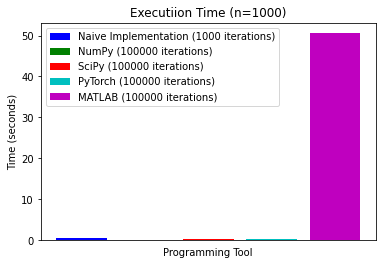

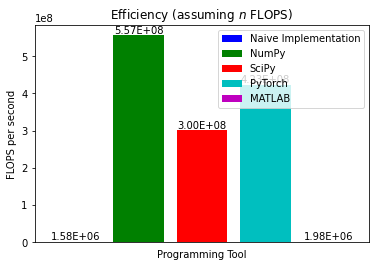

In [6]:
# 2. dot product
def dot_product_np(a, b):
  c = np.dot(a, b)
  return c

def dot_product_sp(a, b):
  c = sp.dot(a, b)
  return c

def dot_product_torch(a, b):
  c = torch.dot(a, b)
  return c

# Timing and Visualization
times = []
a = np.random.rand(1, 1000)
b = np.random.rand(1000, 1)
times.append(profile_fn(mat_mul_naive, [a, b], 1000))
times.append(profile_fn(dot_product_np, [a, b], 100000))
times.append(profile_fn(dot_product_sp, [a, b], 100000))
c = torch.rand(1000)
d = torch.rand(1000)
times.append(profile_fn(dot_product_torch, [c, d], 100000))
times.append(50.567017)
plot_times(
  times=times, 
  tools=['Naive Implementation', 'NumPy', 'SciPy', 'PyTorch', 'MATLAB'],
  title1='Executiion Time (n=1000)', 
  title2='Efficiency (assuming $n$ FLOPS)',
  flops=1000,
  iterations=[1000, 100000, 100000, 100000, 100000])

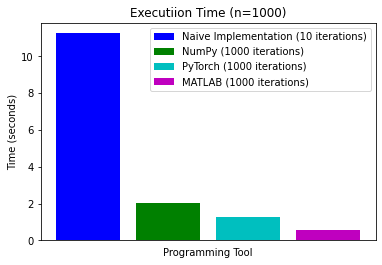

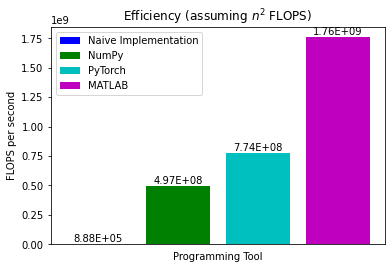

In [7]:
# 3. element wise operations
def element_wise_ops_naive(A, B):
  for i in range(len(A)):
    for j in range(len(A[0])):
      A[i][j] = (A[i][j] + B[i][j]) * B[i][j]
  return A  

def element_wise_ops_naive(A, B):
  for i in range(len(A)):
    for j in range(len(A[0])):
      A[i][j] = (A[i][j] + B[i][j]) * B[i][j]
  return A  

def element_wise_ops_np(A, B):
  A = (A + B) * B
  return A

def element_wise_ops_torch(A, B):
  A = torch.mul(torch.add(A, B), B)
  return A

# Timing and Visualization
times = []
A = np.random.rand(1000, 1000)
B = np.random.rand(1000, 1000)
times.append(profile_fn(element_wise_ops_naive, [np.copy(A), np.copy(B)], 10))
times.append(profile_fn(element_wise_ops_np, [A, B], 1000))
C = torch.rand(1000, 1000)
D = torch.rand(1000, 1000)
times.append(profile_fn(element_wise_ops_torch, [C, D], 1000))
times.append(0.568235)
plot_times(
  times=times, 
  tools=['Naive Implementation', 'NumPy', 'PyTorch', 'MATLAB'],
  title1='Executiion Time (n=1000)', 
  title2='Efficiency (assuming $n^2$ FLOPS)',
  flops=1000**2,
  iterations=[10, 1000, 1000, 1000])

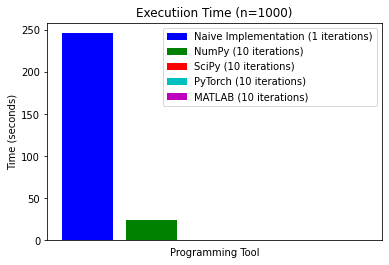

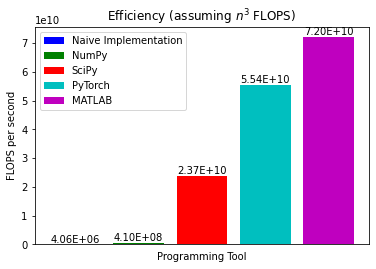

In [8]:
# 4. LU decomp
def LU_decomp_naive(A):
  n = len(A)
  U = copy.deepcopy(A)
  L = []
  for i in range(n):
    L.append([])
    for j in range(n):
      if i == j:
        L[-1].append(1)
      else:
        L[-1].append(0)
  for k in range(n-1):
    for j in range(k+1, n):
      L[j][k] = U[j][k]/U[k][k]
      for i in range(k, n):
        U[j][i] -= L[j][k] * U[k][i]
  return L, U

def LU_decomp_np(A):
  n = A.shape[0]
  U = A.copy()
  L = np.identity(n)
  for k in range(n-1):
    for j in range(k+1, n):
      L[j, k] = U[j, k]/U[k,k]
      U[j, k:n] -= L[j, k] * U[k, k:n]
  return L, U

def LU_decomp_sp(A):
  P, L, U = scipy.linalg.lu(A)
  return P, L, U

def LU_decomp_torch(A):
  A_LU, pivots = torch.lu(A)
  return A_LU, pivots


# Timing and Visualization
times = []
A = np.random.rand(1000, 1000)
times.append(profile_fn(LU_decomp_naive, [A], 1))
times.append(profile_fn(LU_decomp_np, [A], 10))
times.append(profile_fn(LU_decomp_sp, [A], 10))
B = torch.rand(1000, 1000)
times.append(profile_fn(LU_decomp_torch, [B], 10))
times.append(0.138869)
plot_times(
  times=times, 
  tools=['Naive Implementation', 'NumPy', 'SciPy', 'PyTorch', 'MATLAB'],
  title1='Executiion Time (n=1000)', 
  title2='Efficiency (assuming $n^3$ FLOPS)',
  flops=1000**3,
  iterations=[1, 10, 10, 10, 10])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1980.)


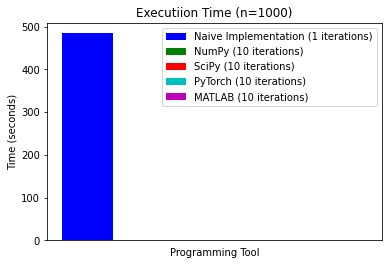

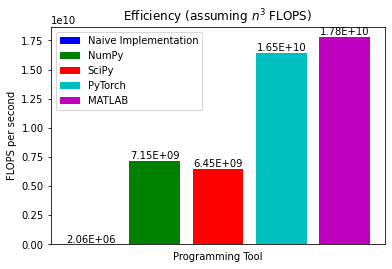

In [9]:
# 5. QR decomp
def QR_decomp_naive(A):
  n = len(A)
  Q = np.zeros((n, n)).tolist()
  R = np.zeros((n, n)).tolist()
  for k in range(n):
    a_k = [A[j][k] for j in range(n)]
    a_k_t = [el for el in a_k]
    for i in range(k):
      q_i = [Q[j][i] for j in range(n)]
      R[i][k] = mat_mul_naive([a_k], [[el] for el in q_i])[0][0]
      for j in range(n):
        a_k_t[j] -= q_i[j] * R[i][k]
    for el in a_k_t:
      R[k][k] += el**2
    R[k][k] = R[k][k]**(.5)
    for j in range(n):
      Q[j][k] = a_k_t[j] / R[k][k]
  return Q, R

def QR_decomp_np(A):
  Q, R = np.linalg.qr(A)
  return Q, R

def QR_decomp_sp(A):
  q, r = sp.linalg.qr(A)
  return q, r

def QR_decomp_torch(A):
  q, r = torch.qr(A)
  return q, r

# Timing and Visualization
times = []
A = np.random.rand(1000, 1000)
times.append(profile_fn(QR_decomp_naive, [A], 1))
times.append(profile_fn(QR_decomp_np, [A], 10))
times.append(profile_fn(QR_decomp_sp, [A], 10))
B = torch.rand(1000, 1000)
times.append(profile_fn(QR_decomp_torch, [B], 10))
times.append(0.562584)
plot_times(
  times=times, 
  tools=['Naive Implementation', 'NumPy', 'SciPy', 'PyTorch', 'MATLAB'],
  title1='Executiion Time (n=1000)', 
  title2='Efficiency (assuming $n^3$ FLOPS)',
  flops=1000**3,
  iterations=[1, 10, 10, 10, 10])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: torch.eig is deprecated in favor of torch.linalg.eig and will be removed in a future PyTorch release.
torch.linalg.eig returns complex tensors of dtype cfloat or cdouble rather than real tensors mimicking complex tensors.
L, _ = torch.eig(A)
should be replaced with
L_complex = torch.linalg.eigvals(A)
and
L, V = torch.eig(A, eigenvectors=True)
should be replaced with
L_complex, V_complex = torch.linalg.eig(A) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2910.)
  # This is added back by InteractiveShellApp.init_path()


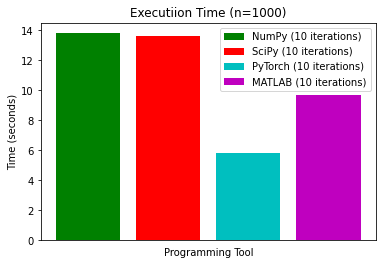

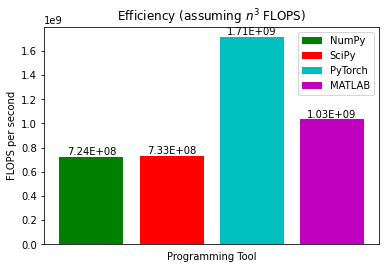

In [10]:
# 6. Eigen Decomp
def eig_np(A):
  vals, vecs = np.linalg.eig(A)
  return vals, vecs

def eig_sp(A):
  vals, vecs = np.linalg.eig(A)
  return vals, vecs

def eig_torch(A):
  vals, vecs = torch.eig(A)
  return vals, vecs


# Timing and Visualization
times = []
A = np.random.rand(1000, 1000)
A = A @ A.transpose()
times.append(profile_fn(eig_np, [A], 10))
times.append(profile_fn(eig_sp, [A], 10))
B = torch.rand(1000, 1000)
B = torch.matmul(B, torch.transpose(B, 0, 1))
times.append(profile_fn(eig_torch, [B], 10))
times.append(9.667445)
plot_times(
  times=times, 
  tools=['NumPy', 'SciPy', 'PyTorch', 'MATLAB'],
  title1='Executiion Time (n=1000)', 
  title2='Efficiency (assuming $n^3$ FLOPS)',
  flops=1000**3,
  iterations=[10, 10, 10, 10])